In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\steve\Documents\CF - Achieve_6'

In [4]:
df = pd.read_excel(os.path.join(path,'Data','Adidas_Dataset_AddPriceCat.xlsx'))

## Checking Dataframe

In [5]:
df.shape

(9644, 15)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,retailer,invoice,region,state,city,product,price_per_unit,units_sold,income,profit,profit_margin,sales_method,price_category
0,0,0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,mid_price
1,1,1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,mid_price
2,2,2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,mid_price
3,3,3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,mid_price
4,4,4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,mid_price


In [7]:
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [8]:
df.head()

,retailer,invoice,region,state,city,product,price_per_unit,units_sold,income,profit,profit_margin,sales_method,price_category
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,mid_price
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,mid_price
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,mid_price
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,mid_price
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,mid_price


In [9]:
# Creating a df with only the string columns to combine with df_clust (being created later)

columns_drop2=['price_per_unit','units_sold','income', 'profit', 'profit_margin']

In [10]:
df_norm=df.drop(columns=columns_drop2).copy()

In [11]:
df_norm.head()

,retailer,invoice,region,state,city,product,sales_method,price_category
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,In-store,mid_price
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,In-store,mid_price
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,In-store,mid_price
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,In-store,mid_price
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,In-store,mid_price


In [12]:
df_norm.to_excel(os.path.join(path,'Data','Adidas_Rejoin.xlsx'))

## Moving Forward with Clustering Process

In [13]:
# Number of potential clusters to use
num_cl = range(1,10)
# Defining kmeans cluster using above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [14]:
# Creating a list of string columns to drop for clustering
columns_drop=['retailer','invoice','region','state','city','product','sales_method','price_category']

In [15]:
df_clust=df.drop(columns=columns_drop).copy()

In [16]:
df_clust.head()

,price_per_unit,units_sold,income,profit,profit_margin
0,50.0,1200,600000.0,300000.0,0.50
1,50.0,1000,500000.0,150000.0,0.30
2,40.0,1000,400000.0,140000.0,0.35
3,45.0,850,382500.0,133875.0,0.35
4,60.0,900,540000.0,162000.0,0.30


In [17]:
# Creating score to store rate of variations for each cluster
score = [kmeans[i].fit(df_clust).score(df_clust) for i in range(len(kmeans))]
score

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-222585183475347.25,
 -58090680450695.984,
 -25607289254983.406,
 -15437295975865.863,
 -10353290502312.045,
 -7783109247187.968,
 -6076299750013.893,
 -5133927026161.049,
 -4460146056884.031]

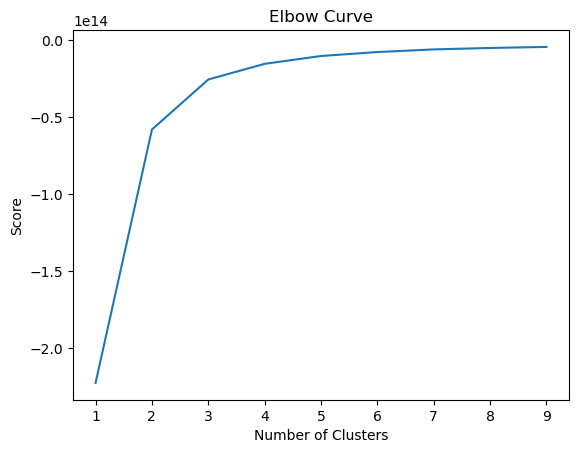

In [18]:
# Creating elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## K-Means Clustering

In [19]:
# Creating k-means object using 4 clusters
kmeans = KMeans(n_clusters = 4)

In [20]:
kmeans.fit(df_clust)

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [21]:
df_clust['clusters'] = kmeans.fit_predict(df_clust)

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
df_clust.head()

,price_per_unit,units_sold,income,profit,profit_margin,clusters
0,50.0,1200,600000.0,300000.0,0.50,0
1,50.0,1000,500000.0,150000.0,0.30,0
2,40.0,1000,400000.0,140000.0,0.35,2
3,45.0,850,382500.0,133875.0,0.35,2
4,60.0,900,540000.0,162000.0,0.30,0


In [23]:
df_clust['clusters'].value_counts()

clusters
1    6296
3    1692
2    1145
0     511
Name: count, dtype: int64

In [24]:
# Creating a backup of file
df_clust.to_excel(os.path.join(path,'Data','Adidas_Clusters.xlsx'))

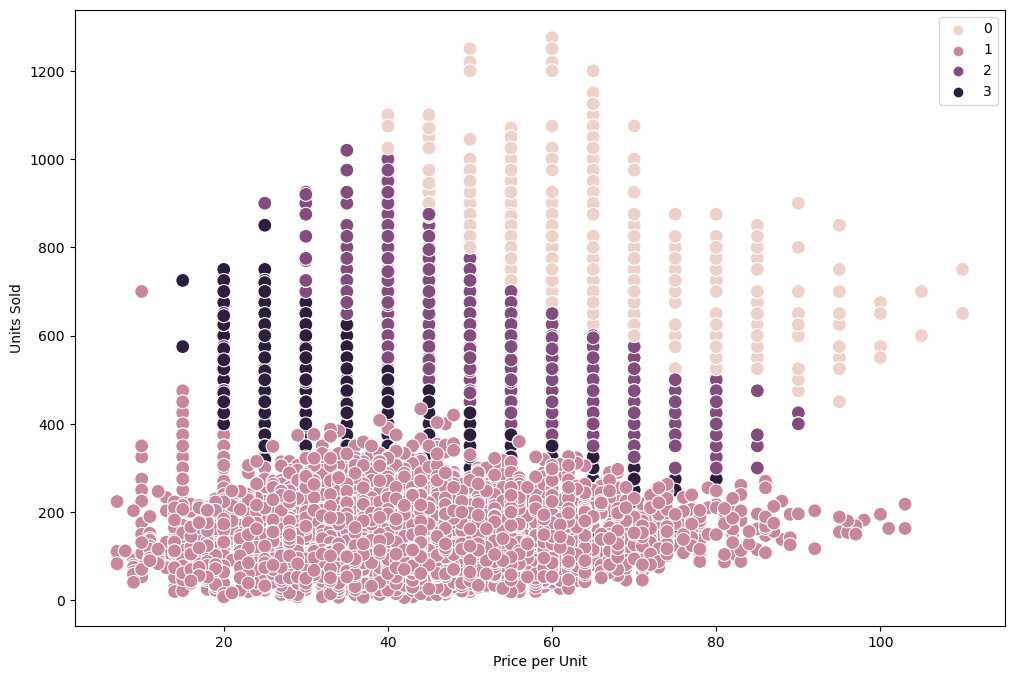

In [25]:
# Ploting price per unit to units sold
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clust['price_per_unit'], y=df_clust['units_sold'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.show()

No correlations to find with this chart.

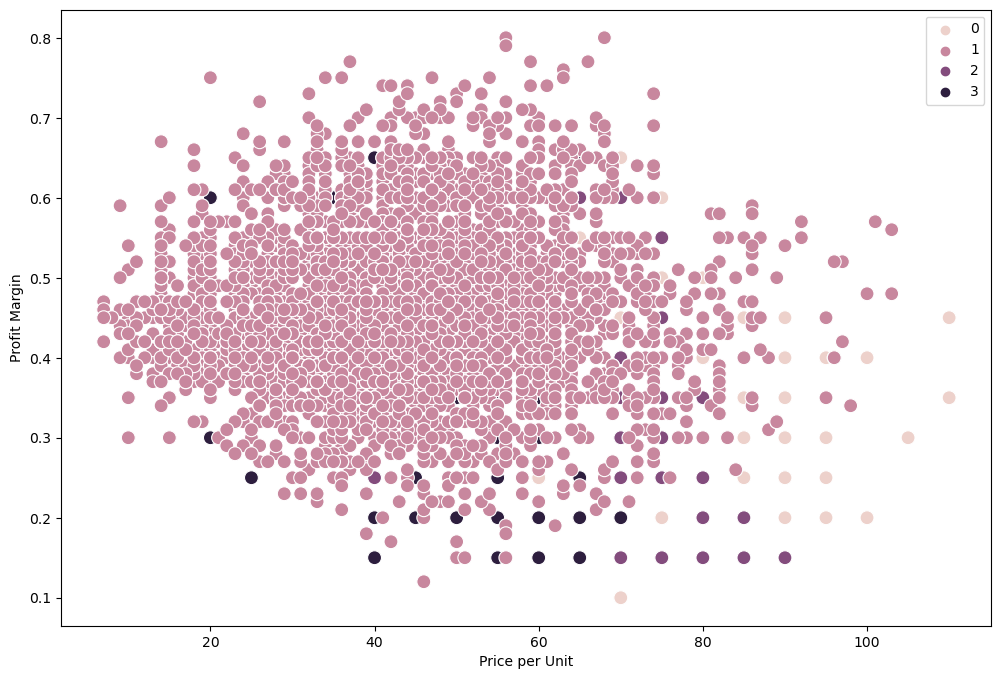

In [26]:
# Ploting price per unit to profit margin
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clust['price_per_unit'], y=df_clust['profit_margin'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Price per Unit')
plt.ylabel('Profit Margin')
plt.show()

There does not appear to be any correlation to derive from this chart.

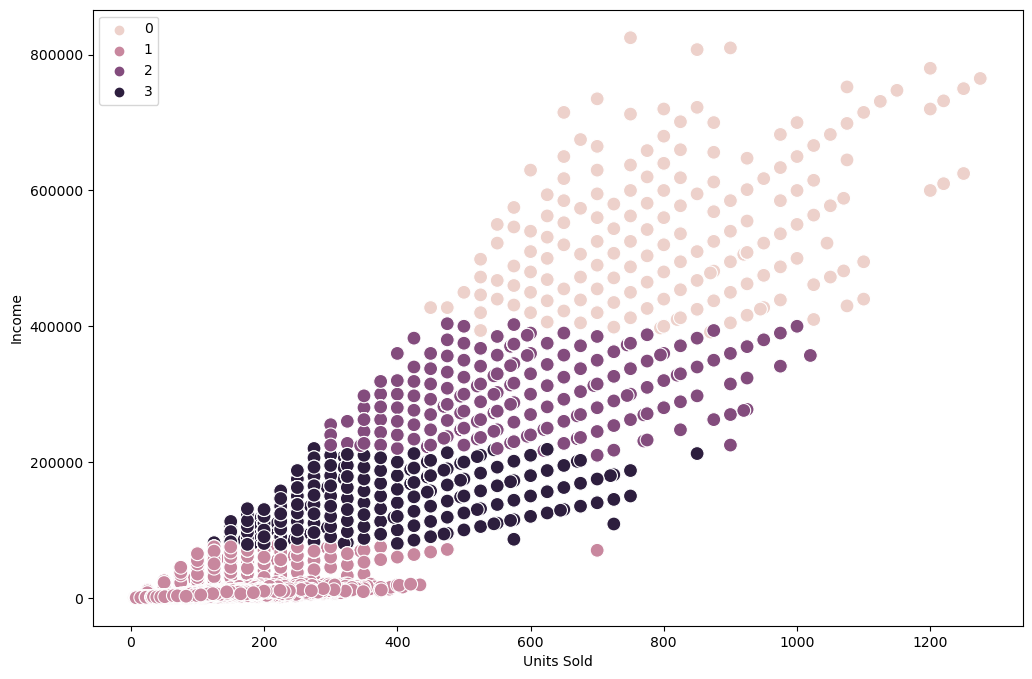

In [27]:
# Ploting units sold to income generated
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clust['units_sold'], y=df_clust['income'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Units Sold')
plt.ylabel('Income')
plt.show()

This one is more promising.  There looks to be a positive correlation to the number of units sold and income generate - which kinda makes sense.  It looks to become a weaker correlation as the number of units sold rises.

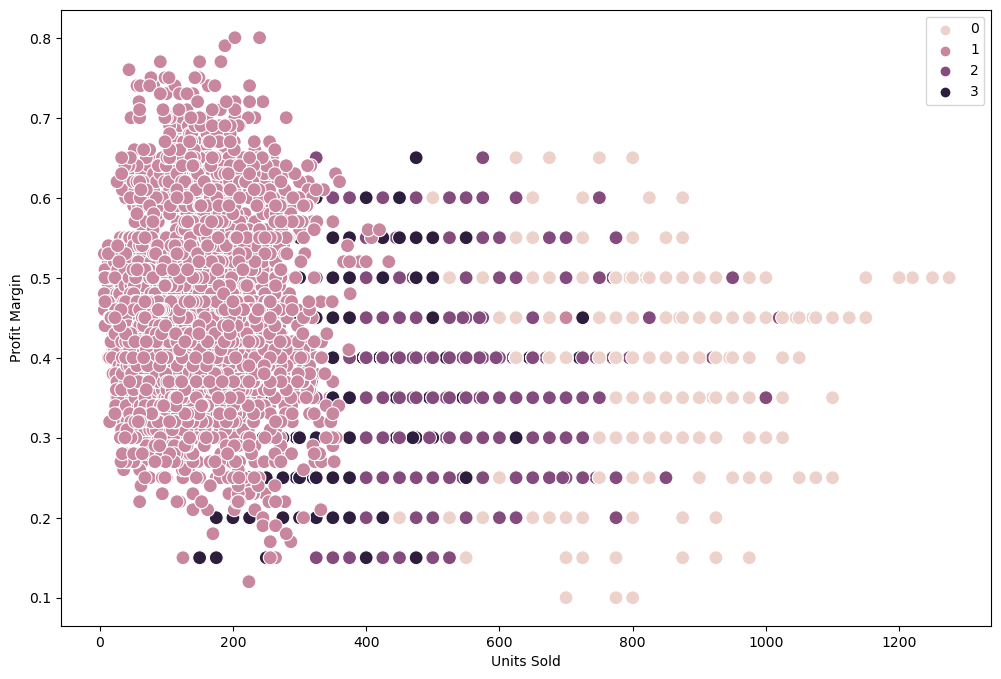

In [28]:
# Ploting units sold to profit margin
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clust['units_sold'], y=df_clust['profit_margin'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Units Sold')
plt.ylabel('Profit Margin')
plt.show()

It does not look like there is any correlation for the amount of units sold and the profit margin, it really can go either ways based on this chart.